### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Módulo que permite definir configurações de localidade.
import locale
locale.setlocale(locale.LC_ALL, '')
import plotly.express as px

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

In [42]:
#Adicionando as lojas em uma única variavel...
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}
lista_dfs = []
for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Loja'] = nome_loja
    lista_dfs.append(df)

todas_Lojas = pd.concat(lista_dfs, ignore_index=True)

# Verificando as Colunas após a concatenação...
print(todas_Lojas.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      dtype='object')


# 1. Análise do faturamento


In [65]:
# Adiciona a coluna FaturamentoTotal ao DataFrame combinado
todas_Lojas['FaturamentoTotal'] = todas_Lojas['Preço'] + todas_Lojas['Frete']

# Total do frete
TotalFrete = todas_Lojas['Frete'].sum()
print(f'Valor total dos Fretes: R$ {locale.format_string("%.2f", TotalFrete, grouping=True)}')

# Faturamento sem frete (Total de Preços)
FaturamentoParcial = todas_Lojas['Preço'].sum()
print(f'Total Faturamento sem Frete: R$ {locale.format_string("%.2f", FaturamentoParcial, grouping=True)}')

# Faturamento total (soma dos FaturamentosTotais)
FaturamentoTotal_geral = todas_Lojas['FaturamentoTotal'].sum()
print(f'Total Faturamento com Frete: R$ {locale.format_string("%.2f", FaturamentoTotal_geral, grouping=True)}\n')

# Faturamento por loja
faturamento_por_loja = todas_Lojas.groupby('Loja')['FaturamentoTotal'].sum().reset_index()

for index, row in faturamento_por_loja.iterrows():
    print(f'{row["Loja"]}: R$ {locale.format_string("%.2f", row["FaturamentoTotal"], grouping=True)}\n')

print(todas_Lojas.columns)

Valor total dos Fretes: R$ 312,930.66
Total Faturamento sem Frete: R$ 5,871,490.79
Total Faturamento com Frete: R$ 6,184,421.45

Loja 1: R$ 1,616,347.09

Loja 2: R$ 1,567,773.22

Loja 3: R$ 1,542,047.69

Loja 4: R$ 1,458,253.46

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja',
       'FaturamentoTotal'],
      dtype='object')


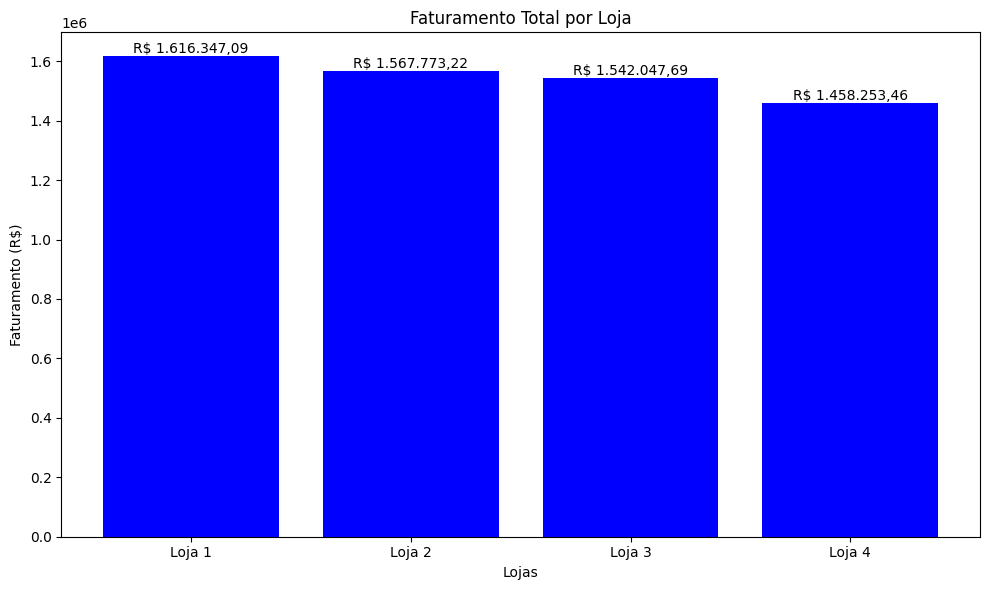

In [6]:
# Função alternativa para modificar os valores.EX:(Moeda(BR)).
def formatar_brasileiro(valor):
    return f'R$ {valor:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.')

# Dados para o gráfico (usando o DataFrame agrupado anteriormente)
lojas = faturamento_por_loja['Loja']
valores = faturamento_por_loja['FaturamentoTotal']

# Gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, valores, color='blue')

# Adiciona os valores formatados nas colunas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, formatar_brasileiro(yval), va='bottom', ha='center') # va='bottom' coloca o texto acima da barra

plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento Total por Loja')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


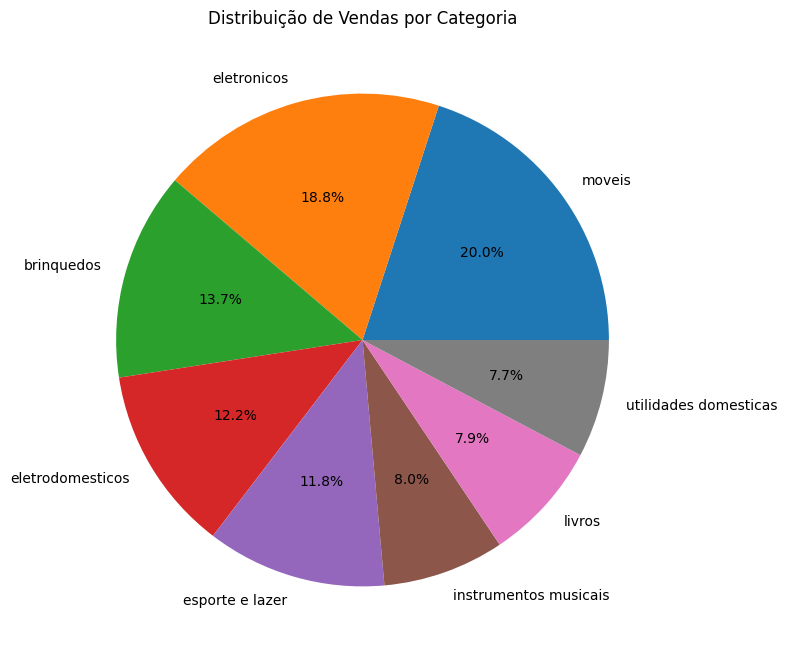

In [57]:
# Contagem total de vendas por categoria
contagem_vendas_por_categoria = todas_Lojas['Categoria do Produto'].value_counts()

# Gráfico de Pizza para distribuição de vendas por Categorias.
Grafico_Pizza = contagem_vendas_por_categoria.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
Grafico_Pizza.set_title('Distribuição de Vendas por Categoria')
Grafico_Pizza.set_ylabel('') # Remove o label padrão do eixo y
plt.show()




In [77]:
#Pegando o total de vendas por categoria.
contagem_vendas_por_categoria = todas_Lojas['Categoria do Produto'].value_counts()
print("Total de Vendas por Categoria:\t Quantidade: \n",contagem_vendas_por_categoria.reset_index())
# Faturamento total por categoria (usando a coluna FaturamentoTotal)
faturamento_por_categoria = (
    todas_Lojas.groupby('Categoria do Produto')['FaturamentoTotal'].sum()).apply(lambda x: locale.format_string("%.2f", x, grouping=True)).reset_index().rename(columns={'FaturamentoTotal': 'Faturamento Total'})

print("\nFaturamento Total por Categoria:\n", faturamento_por_categoria.sort_values(by='Faturamento Total', ascending=True))


Total de Vendas por Categoria:	 Quantidade: 
     Categoria do Produto  count
0                 moveis   1886
1            eletronicos   1772
2             brinquedos   1290
3       eletrodomesticos   1149
4        esporte e lazer   1113
5  instrumentos musicais    753
6                 livros    742
7  utilidades domesticas    730

Faturamento Total por Categoria:
     Categoria do Produto Faturamento Total
6                 moveis      1,064,149.77
1       eletrodomesticos      1,860,198.66
0             brinquedos        103,502.36
2            eletronicos      2,332,048.08
3        esporte e lazer        200,891.94
4  instrumentos musicais        489,701.48
5                 livros         53,007.43
7  utilidades domesticas         80,921.72


# 3. Média de Avaliação das Lojas

In [80]:
#Pegando as lojas e agrupando por avaliação.
media_avaliacao_lojas = todas_Lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
print("Média de Avaliação por Loja:")
print(media_avaliacao_lojas.round(2)) # Arredondamos para 2 casas decimais para a média

grafico = px.bar(media_avaliacao_lojas, x='Loja', y='Avaliação da compra', title='Média de Avaliação por Loja')
grafico.update_layout(xaxis_title='Loja', yaxis_title='Média de Avaliação')
grafico.update_traces(marker_color='aquamarine')
grafico.update_traces(texttemplate='%{y:.2f}', textposition='outside')
grafico.update_layout(height=500, width=800)
grafico.update_layout(margin=dict(l=20, r=20, t=50, b=20))
grafico.update_layout(font=dict(size=12))
grafico.update_layout(plot_bgcolor='rgba(0,0,0,0)')

grafico.show()

Média de Avaliação por Loja:
     Loja  Avaliação da compra
0  Loja 1                 3.98
1  Loja 2                 4.04
2  Loja 3                 4.05
3  Loja 4                 4.00


# 4. Produtos Mais e Menos Vendidos

In [90]:
#Total do item mais e menos vendido...
contagem_produtos = todas_Lojas['Produto'].value_counts()

produto_mais_vendido = contagem_produtos.idxmax()
quantidade_mais_vendido = contagem_produtos.max()

produto_menos_vendido = contagem_produtos.idxmin()
quantidade_menos_vendido = contagem_produtos.min()

print(f'Produto mais vendido: {produto_mais_vendido} ({quantidade_mais_vendido} unidades)')
print(f'Produto menos vendido: {produto_menos_vendido} ({quantidade_menos_vendido} unidades)')

# Gráfico dos Top 10 Produtos Mais Vendidos
top_10_produtos = contagem_produtos.head(10)

grafico_mais_vendido = px.bar(top_10_produtos, x=top_10_produtos.index, y=top_10_produtos.values)
grafico_mais_vendido.update_layout(xaxis_title='Produto', yaxis_title='Quantidade Vendida', title='Top 10 dos Produtos Mais Vendidos')
grafico_mais_vendido.update_traces(marker_color='green')
grafico_mais_vendido.update_traces(texttemplate='%{y}', textposition='outside')
grafico_mais_vendido.update_layout(height=500, width=950)
grafico_mais_vendido.show()

Produto mais vendido: Cômoda (210 unidades)
Produto menos vendido: Celular ABXY (157 unidades)


# 5. Frete Médio por Loja


In [16]:
## 5. Frete Médio por Loja

frete_medio_por_loja = todas_Lojas.groupby('Loja')['Frete'].mean().reset_index()
print("Frete Médio por Loja:")
print(frete_medio_por_loja.round(2)) # Arredondamos para 2 casas decimais

Grafico_Barra = px.bar(frete_medio_por_loja, x='Loja', y='Frete', title='Frete Médio por Loja')
Grafico_Barra.update_layout(xaxis_title='Loja', yaxis_title='Frete Médio')
Grafico_Barra.update_traces(marker_color='skyblue')
Grafico_Barra.update_traces(texttemplate='%{y:.2f}', textposition='outside')
Grafico_Barra.update_layout(height=500, width=800)
Grafico_Barra.show() # Adicionamos .show() para garantir que o gráfico seja exibido


Frete Médio por Loja:
     Loja  Frete
0  Loja 1  34.69
1  Loja 2  33.62
2  Loja 3  33.07
3  Loja 4  31.28


# *Conclusão da Análise.*


 *O dono deve vender a loja 2, pois ela possui o menor faturamento total e o menor frete médio. Além disso, a loja 4 possui a menor média de avaliação entre as lojas.Com isso podendo investir mais em marketing e produtos para as outras lojas.*